### Neste capítulo veremos como usar as funções de join no pandas.
1. Faremos um inner join usando a função pd.merge com o argumento how="inner"
2. Veremos alguns tipos de relacionamentos entre tabelas, como: one-to-one, one-to-many
3. Faremos join de vários tabelas usando vários .merge seguidos

In [1]:
import pandas as pd
import numpy as np

In [2]:
produtos=pd.DataFrame({"ID":np.arange(1,11), "tipo": ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]})
produtos

,ID,tipo
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A
5,6,B
6,7,B
7,8,B
8,9,B
9,10,B


In [6]:
clientes=pd.DataFrame({"cliente": np.arange(1,8), "ID": [2, 2, 2, 3, 4, 7, 1]})
clientes

,cliente,ID
0,1,2
1,2,2
2,3,2
3,4,3
4,5,4
5,6,7
6,7,1


### Para fazermos um inner join usamos a função pd.merge com o argumento how="inner" e usaremos o ID do produto como chave para unir as bases

In [7]:
pd.merge(produtos, clientes, how="inner", on="ID")

,ID,tipo,cliente
0,1,A,7
1,2,A,1
2,2,A,2
3,2,A,3
4,3,A,4
5,4,A,5
6,7,B,6


#### Se tivessemos nomes diferentes para as chaves usariamos os argumentos left_on e right_on. Por exemplo:

In [8]:
clientes=pd.DataFrame({"cliente": np.arange(1,8), "produto_id": [2, 2, 2, 3, 4, 7, 1]})

In [9]:
produtos.head()

,ID,tipo
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [10]:
clientes.head()

,cliente,produto_id
0,1,2
1,2,2
2,3,2
3,4,3
4,5,4


In [12]:
pd.merge(produtos, clientes, how="inner", left_on="ID", right_on="produto_id")

,ID,tipo,cliente,produto_id
0,1,A,7,1
1,2,A,1,2
2,2,A,2,2
3,2,A,3,2
4,3,A,4,3
5,4,A,5,4
6,7,B,6,7


#### Se tivermos colunas com mesmos nomes e tabelas diferentes podemos usar o argumentos suffixes para diferenciarmos cada coluna

In [13]:
produtos=pd.DataFrame({"ID":np.arange(1,11), "tipo": ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]})

In [16]:
clientes=pd.DataFrame({"cliente": np.arange(1,8), "produto_id": [2, 2, 2, 3, 4, 7, 1], "tipo": ["A", "A", "A", "A", "A", "B", "A"]})

In [17]:
print(produtos.head())
print(clientes.head())

   ID tipo
0   1    A
1   2    A
2   3    A
3   4    A
4   5    A
   cliente  produto_id tipo
0        1           2    A
1        2           2    A
2        3           2    A
3        4           3    A
4        5           4    A


In [20]:
pd.merge(produtos, clientes, how="inner", left_on="ID", right_on="produto_id", suffixes=("_prod", "_cli"))

,ID,tipo_prod,cliente,produto_id,tipo_cli
0,1,A,7,1,A
1,2,A,1,2,A
2,2,A,2,2,A
3,2,A,3,2,A
4,3,A,4,3,A
5,4,A,5,4,A
6,7,B,6,7,B


## Relacionamento entre tabelas:
1. one_to_one: é quando uma observação da tabela da esquerda se relaciona com exatamente uma observação com a tabela da direita
2. one_to_many: é quando uma observação da tabela da esquerda se relaciona pelo menos uma observação com a tabela da direita

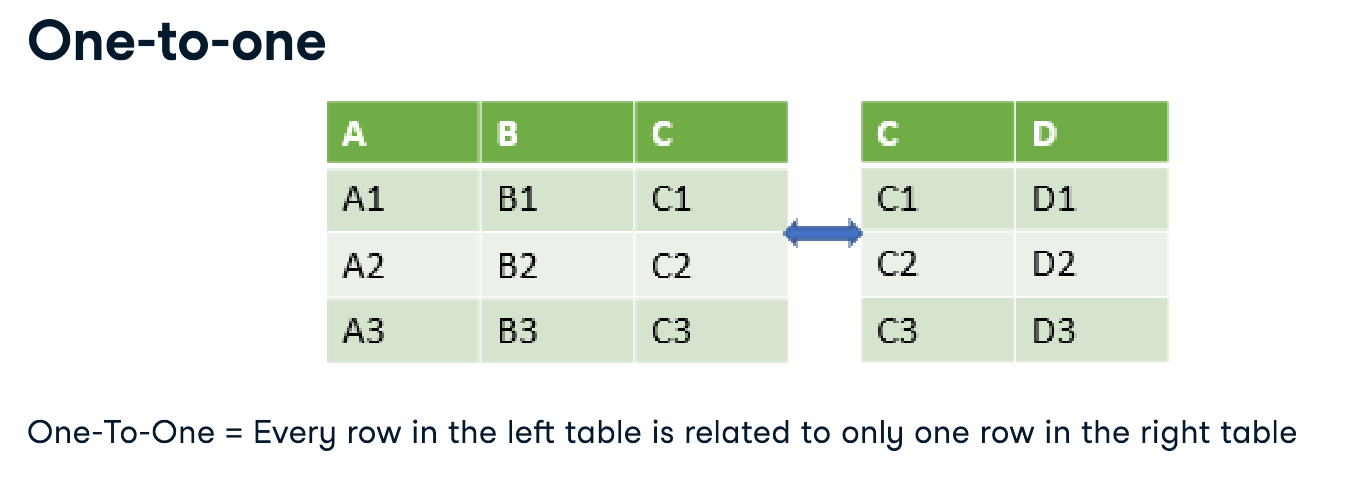

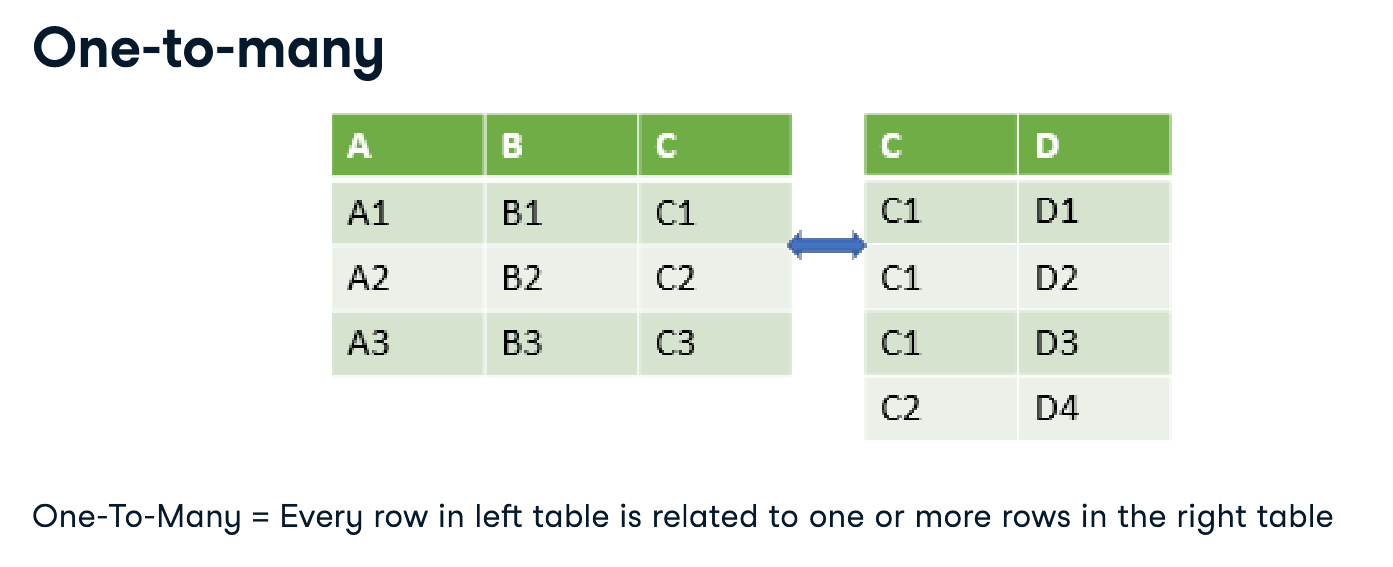

### Também podemos usar join em vários tabelas usando o .merge várias vezes seguidas

In [25]:
nomes_produtos=pd.DataFrame({"ID":np.arange(1,11), "nome": ["Ventilador", "Mesa", "Cadeira", "Computador",
                                                            "Mouse", "Rede", "Mochila", "Fone de ouvido", "Carregador",
                                                            "Celular"]})
nomes_produtos

,ID,nome
0,1,Ventilador
1,2,Mesa
2,3,Cadeira
3,4,Computador
4,5,Mouse
5,6,Rede
6,7,Mochila
7,8,Fone de ouvido
8,9,Carregador
9,10,Celular


In [26]:
produtos.merge(clientes, how="inner", left_on="ID", right_on="produto_id", suffixes=("_prod", "_cli"))\
.merge(nomes_produtos, how="inner", on="ID")

,ID,tipo_prod,cliente,produto_id,tipo_cli,nome
0,1,A,7,1,A,Ventilador
1,2,A,1,2,A,Mesa
2,2,A,2,2,A,Mesa
3,2,A,3,2,A,Mesa
4,3,A,4,3,A,Cadeira
5,4,A,5,4,A,Computador
6,7,B,6,7,B,Mochila
